# figrecipe - Record and Reproduce Matplotlib Figures

This notebook demonstrates all key features of figrecipe:

1. **Basic Usage** - Recording and reproducing figures
2. **Multiple Subplots** - Multi-panel figures
3. **MM-Based Layout** - Precise millimeter-based sizing
4. **Style Presets** - DEFAULT and SCIENTIFIC (SCITEX standard)
5. **Dark Theme** - Eye-friendly dark mode
6. **Seaborn Integration** - Recording seaborn plots
7. **Validation** - Verifying reproducibility (enabled by default)
8. **Recipe Inspection** - Examining saved recipes
9. **Data Import/Export** - Extract data from recipes

In [1]:
# Setup
%matplotlib inline

import sys

sys.path.insert(0, "../src")

import numpy as np
import figrecipe.plt as plt  # Drop-in replacement for matplotlib.pyplot
import figrecipe as ps
from pathlib import Path

# Create output directory
output_dir = Path("../outputs/notebook")
output_dir.mkdir(parents=True, exist_ok=True)

# Add subtle figure edges for documentation visibility
_original_subplots = plt.subplots


def _subplots_with_edge(*args, **kwargs):
    fig, axes = _original_subplots(*args, **kwargs)
    # Access underlying matplotlib figure
    mpl_fig = fig.fig if hasattr(fig, "fig") else fig
    mpl_fig.patch.set_edgecolor("#aaaaaa")
    mpl_fig.patch.set_linewidth(1.5)
    return fig, axes


plt.subplots = _subplots_with_edge

print(f"figrecipe version: {ps.__version__}")

figrecipe version: 0.4.0


---
## 1. Basic Usage

Use `ps.subplots()` as a drop-in replacement for `plt.subplots()`. All plotting calls are automatically recorded.

Saved: ../outputs/notebook/basic_example.yaml (Validation: PASSED)


(PosixPath('../outputs/notebook/basic_example.yaml'),
 ValidationResult(VALID, mse=0.00, size=match))

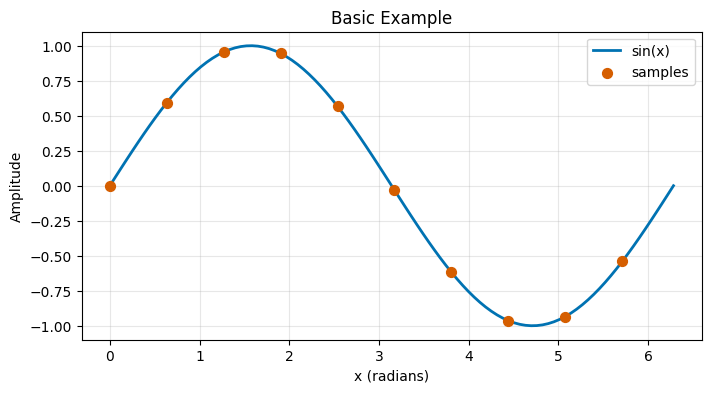

In [2]:
# Create sample data
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

# Create a recording-enabled figure
fig, ax = ps.subplots(figsize=(8, 4))

# Plot as usual - use 'id' parameter for meaningful names
ax.plot(x, y, color="#0072B2", linewidth=2, label="sin(x)", id="sine_wave")
ax.scatter(
    x[::10], y[::10], s=50, color="#D55E00", zorder=5, label="samples", id="samples"
)

# Add decorations (also recorded)
ax.set_xlabel("x (radians)")
ax.set_ylabel("Amplitude")
ax.set_title("Basic Example")
ax.legend()
ax.grid(True, alpha=0.3)

# Save the recipe (auto-validates and prints status)
recipe_path = output_dir / "basic_example.yaml"
ps.save(fig, recipe_path)

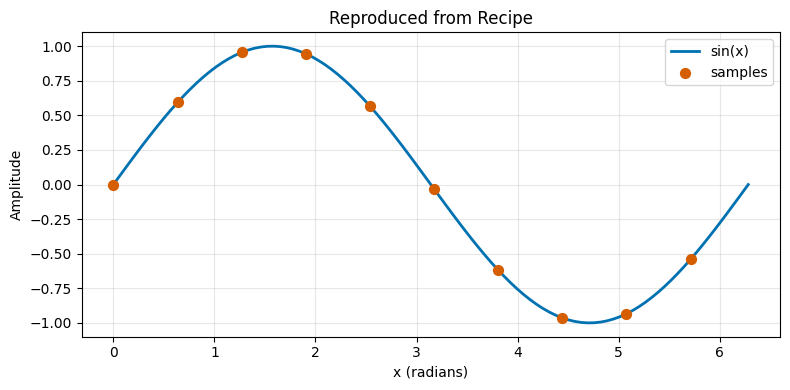

In [3]:
# Reproduce the figure from the recipe
fig_reproduced, ax_reproduced = ps.reproduce(recipe_path)
ax_reproduced.set_title("Reproduced from Recipe")
plt.tight_layout()

---
## 2. Multiple Subplots

Create multi-panel figures with automatic recording of all axes.

Saved: ../outputs/notebook/multi_panel.yaml (Validation: FAILED)


(PosixPath('../outputs/notebook/multi_panel.yaml'),
 ValidationResult(INVALID, mse=3834.91, size=match))

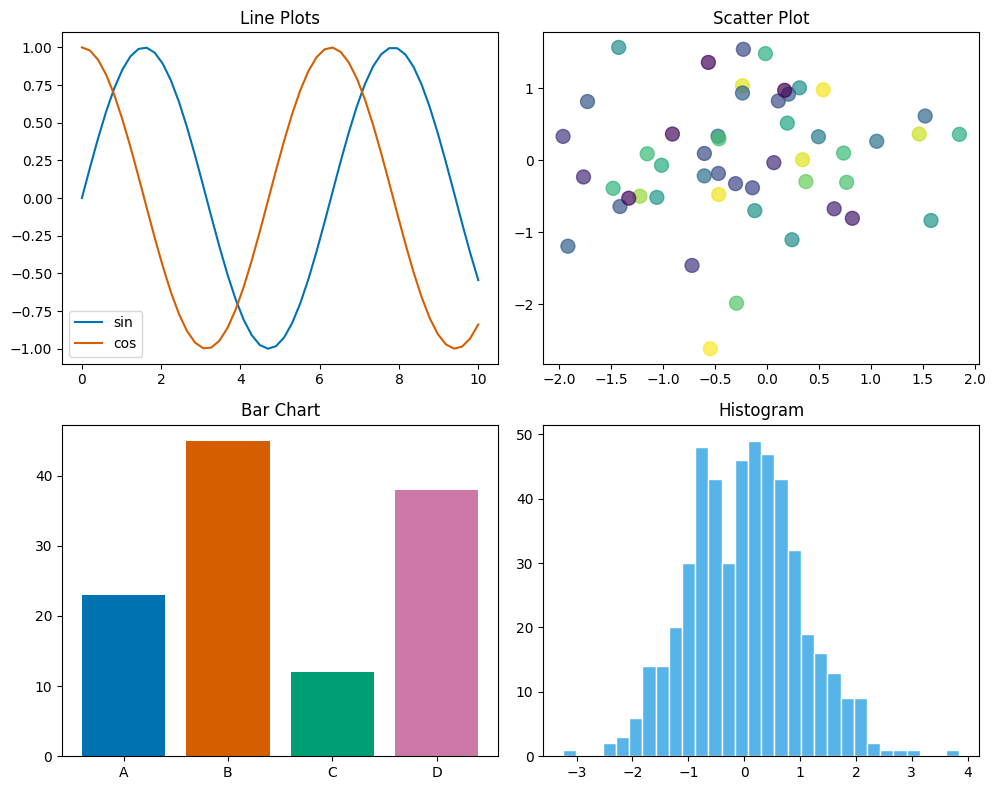

In [4]:
# Create 2x2 subplots
fig, axes = ps.subplots(2, 2, figsize=(10, 8))

# Different plot types in each panel
x = np.linspace(0, 10, 50)

# Top-left: Line plot
axes[0][0].plot(x, np.sin(x), color="#0072B2", id="line_sin")
axes[0][0].plot(x, np.cos(x), color="#D55E00", id="line_cos")
axes[0][0].set_title("Line Plots")
axes[0][0].legend(["sin", "cos"])

# Top-right: Scatter plot
np.random.seed(42)
axes[0][1].scatter(
    np.random.randn(50),
    np.random.randn(50),
    c=np.random.rand(50),
    s=100,
    alpha=0.7,
    id="scatter",
)
axes[0][1].set_title("Scatter Plot")

# Bottom-left: Bar plot
categories = ["A", "B", "C", "D"]
values = [23, 45, 12, 38]
axes[1][0].bar(
    categories, values, color=["#0072B2", "#D55E00", "#009E73", "#CC79A7"], id="bars"
)
axes[1][0].set_title("Bar Chart")

# Bottom-right: Histogram
data = np.random.normal(0, 1, 500)
axes[1][1].hist(data, bins=30, color="#56B4E9", edgecolor="white", id="histogram")
axes[1][1].set_title("Histogram")

plt.tight_layout()

# Save (auto-validates and prints status)
multi_panel_recipe = output_dir / "multi_panel.yaml"
ps.save(fig, multi_panel_recipe)

Multi-panel figure reproduced successfully!


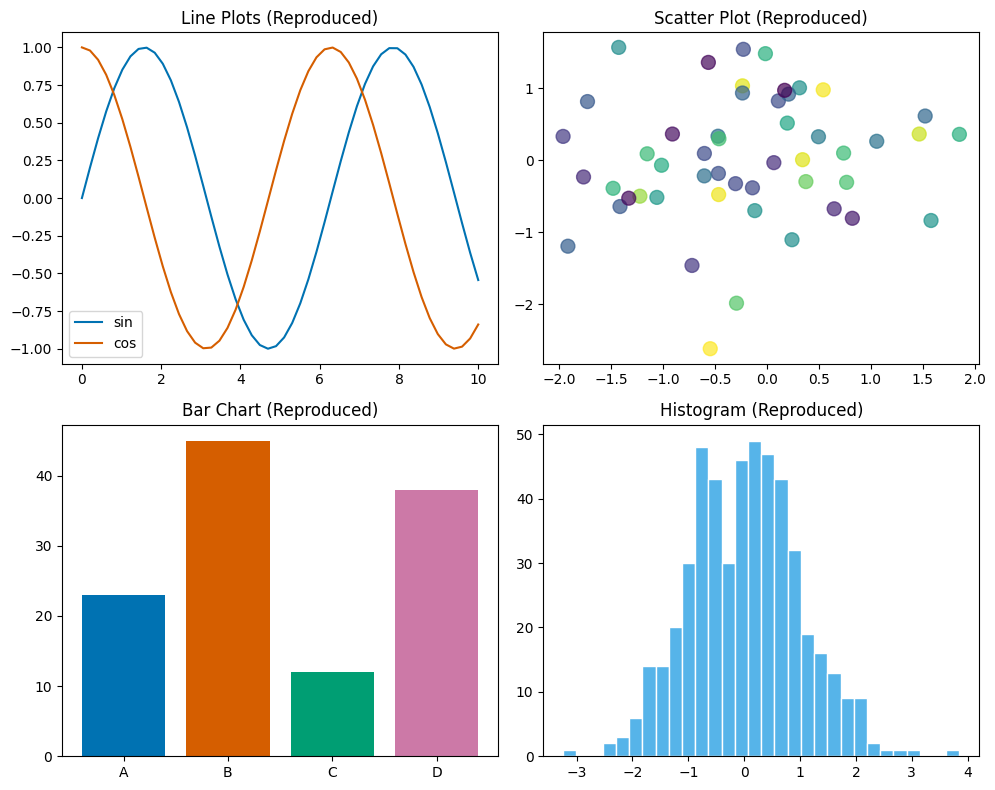

In [5]:
# Reproduce the multi-panel figure from recipe
fig_rep, axes_rep = ps.reproduce(multi_panel_recipe)

# Update titles to show it's reproduced
axes_rep[0][0].set_title("Line Plots (Reproduced)")
axes_rep[0][1].set_title("Scatter Plot (Reproduced)")
axes_rep[1][0].set_title("Bar Chart (Reproduced)")
axes_rep[1][1].set_title("Histogram (Reproduced)")

plt.tight_layout()
print("Multi-panel figure reproduced successfully!")

---
## 3. MM-Based Layout

Create publication-quality figures with precise millimeter-based dimensions.

Figure size: 80.0 x 60.0 mm


Saved: ../outputs/notebook/mm_layout.yaml (Validation: PASSED)


(PosixPath('../outputs/notebook/mm_layout.yaml'),
 ValidationResult(VALID, mse=0.00, size=match))

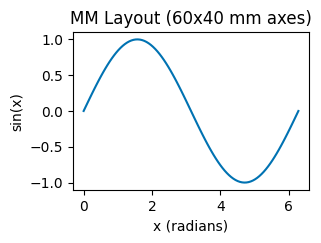

In [6]:
# Create figure with mm-based dimensions
fig, ax = ps.subplots(
    axes_width_mm=60,  # 60mm wide axes
    axes_height_mm=40,  # 40mm tall axes
    margin_left_mm=15,  # Left margin for y-axis labels
    margin_right_mm=5,  # Right margin
    margin_bottom_mm=12,  # Bottom margin for x-axis labels
    margin_top_mm=8,  # Top margin for title
)

# Get actual figure size
fig_width_mm = fig.fig.get_figwidth() * 25.4
fig_height_mm = fig.fig.get_figheight() * 25.4
print(f"Figure size: {fig_width_mm:.1f} x {fig_height_mm:.1f} mm")

# Plot
x = np.linspace(0, 2 * np.pi, 100)
ax.plot(x, np.sin(x), color="#0072B2", linewidth=1.5, id="sine")
ax.set_xlabel("x (radians)")
ax.set_ylabel("sin(x)")
ax.set_title("MM Layout (60x40 mm axes)")

# Save (auto-validates and prints status)
recipe_path = output_dir / "mm_layout.yaml"
ps.save(fig, recipe_path)

Total figure width: 97.0 mm


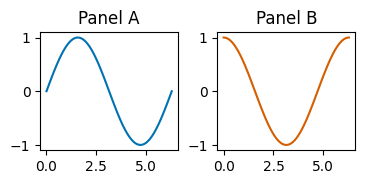

In [7]:
# Multi-panel with mm spacing
fig, axes = ps.subplots(
    nrows=1,
    ncols=2,
    axes_width_mm=35,
    axes_height_mm=30,
    margin_left_mm=12,
    margin_bottom_mm=10,
    space_w_mm=10,  # 10mm horizontal spacing between panels
)

x = np.linspace(0, 2 * np.pi, 100)
axes[0].plot(x, np.sin(x), color="#0072B2", id="left")
axes[0].set_title("Panel A")
axes[1].plot(x, np.cos(x), color="#D55E00", id="right")
axes[1].set_title("Panel B")

fig_width_mm = fig.fig.get_figwidth() * 25.4
print(f"Total figure width: {fig_width_mm:.1f} mm")

---
## 4. Style Presets

figrecipe includes two built-in style presets:
- **SCIENTIFIC** (default): Publication-quality SCITEX standard with RGB color palette
- **DEFAULT**: General-purpose with larger fonts for everyday use

In [8]:
# List available presets
print("Available presets:", ps.list_presets())

Available presets: ['DEFAULT', 'SCIENTIFIC']


In [9]:
# Load and compare presets
for preset_name in ps.list_presets():
    style = ps.load_style(preset_name)
    print(f"\n{preset_name}:")
    print(f"  Font: {style.fonts.family}")
    print(f"  Axes size: {style.axes.width_mm}x{style.axes.height_mm} mm")
    print(f"  Axis label: {style.fonts.axis_label_pt} pt")
    print(f"  Line width: {style.lines.trace_mm} mm")


DEFAULT:
  Font: DejaVu Sans
  Axes size: 60x45 mm
  Axis label: 10 pt
  Line width: 0.4 mm

SCIENTIFIC:
  Font: Arial
  Axes size: 40x28 mm
  Axis label: 7 pt
  Line width: 0.2 mm


DEFAULT: 83x67mm figure
SCIENTIFIC: 80x68mm figure


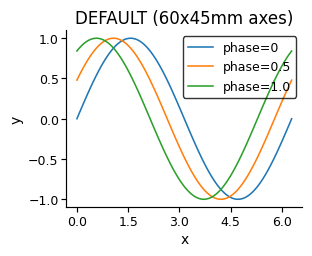

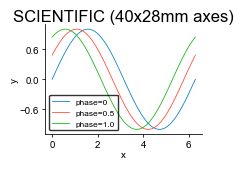

In [10]:
# Create separate figures with each preset's actual dimensions
x = np.linspace(0, 2 * np.pi, 100)

for preset_name in ps.list_presets():
    style = ps.load_style(preset_name)

    # Use the preset's actual axes dimensions
    fig, ax = ps.subplots(
        axes_width_mm=style.axes.width_mm,
        axes_height_mm=style.axes.height_mm,
        margin_left_mm=style.margins.left_mm,
        margin_right_mm=style.margins.right_mm,
        margin_bottom_mm=style.margins.bottom_mm,
        margin_top_mm=style.margins.top_mm,
    )

    # Plot with preset colors (normalized for matplotlib)
    colors = style.colors.palette
    for j, phase in enumerate([0, 0.5, 1.0]):
        color = ps.normalize_color(colors[j])
        ax.plot(
            x,
            np.sin(x + phase),
            color=color,
            linewidth=ps.mm_to_pt(style.lines.trace_mm),
            label=f"phase={phase}",
        )

    # Get actual size
    fig_w = fig.fig.get_figwidth() * 25.4
    fig_h = fig.fig.get_figheight() * 25.4
    ax.set_title(f"{preset_name} ({style.axes.width_mm}x{style.axes.height_mm}mm axes)")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(fontsize=style.fonts.legend_pt)

    # Apply style
    ps.apply_style(ax, style)

    print(f"{preset_name}: {fig_w:.0f}x{fig_h:.0f}mm figure")

Saved: ../outputs/notebook/styled_figure.yaml (Validation: PASSED)


(PosixPath('../outputs/notebook/styled_figure.yaml'),
 ValidationResult(VALID, mse=0.00, size=match))

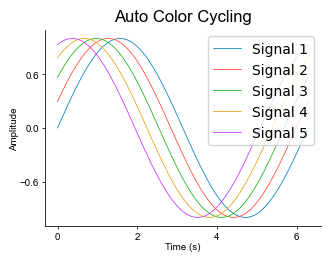

In [11]:
# Use SCIENTIFIC preset with apply_style_mm=True for auto color cycling
fig, ax = ps.subplots(
    axes_width_mm=70,
    axes_height_mm=50,
    margin_left_mm=15,
    margin_bottom_mm=12,
    apply_style_mm=True,  # Applies SCIENTIFIC style automatically
)

# Colors auto-cycle from the colorblind-friendly palette
style = ps.load_style()
trace_lw = ps.mm_to_pt(style.lines.trace_mm)

for i in range(5):
    ax.plot(
        x,
        np.sin(x + i * 0.3),
        linewidth=trace_lw,
        label=f"Signal {i+1}",
        id=f"signal_{i}",
    )

ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_title("Auto Color Cycling")
ax.legend(loc="upper right")

# Save with automatic validation
recipe_path = output_dir / "styled_figure.yaml"
ps.save(fig, recipe_path, validate=True)

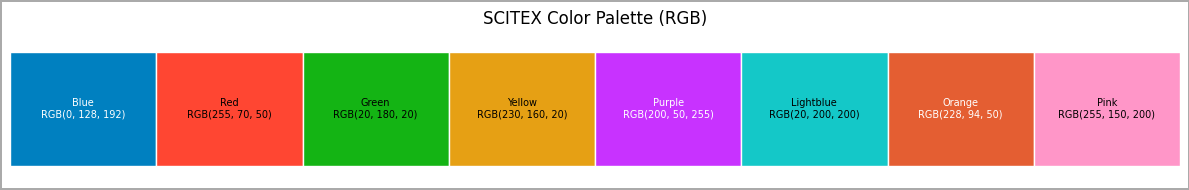

In [12]:
# Show the SCITEX color palette (RGB format)
style = ps.load_style("SCIENTIFIC")
colors = style.colors.palette
names = ["Blue", "Red", "Green", "Yellow", "Purple", "Lightblue", "Orange", "Pink"]

fig, ax = plt.subplots(figsize=(12, 2))
for i, (color, name) in enumerate(zip(colors, names)):
    # Convert RGB list to normalized values for matplotlib
    rgb_norm = [c / 255 for c in color] if isinstance(color, list) else color
    ax.barh(0, 1, left=i, color=rgb_norm, edgecolor="white")
    rgb_str = (
        f"RGB({color[0]}, {color[1]}, {color[2]})" if isinstance(color, list) else color
    )
    ax.text(
        i + 0.5,
        0,
        f"{name}\n{rgb_str}",
        ha="center",
        va="center",
        fontsize=7,
        color="white" if i in [0, 4, 6] else "black",
    )

ax.set_xlim(0, len(colors))
ax.set_ylim(-0.5, 0.5)
ax.axis("off")
ax.set_title("SCITEX Color Palette (RGB)", fontsize=12, pad=10)
plt.tight_layout()

---
## 5. Dark Theme

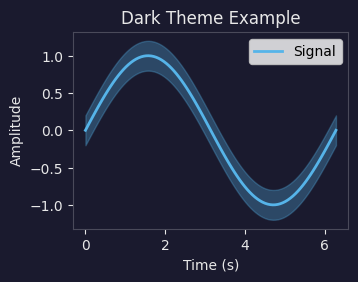

In [13]:
from figrecipe.styles import apply_theme_colors

fig, ax = ps.subplots(
    axes_width_mm=70,
    axes_height_mm=50,
    margin_left_mm=15,
    margin_bottom_mm=12,
)

# Apply dark theme
apply_theme_colors(ax.ax, theme="dark")

# Plot with bright colors
x = np.linspace(0, 2 * np.pi, 100)
ax.plot(x, np.sin(x), color="#56B4E9", linewidth=2, label="Signal", id="dark_signal")
ax.fill_between(
    x, np.sin(x) - 0.2, np.sin(x) + 0.2, alpha=0.3, color="#56B4E9", id="confidence"
)

ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_title("Dark Theme Example")
ax.legend()

---
## 6. Seaborn Integration

Record and reproduce seaborn plots using `ps.sns`.

In [14]:
import pandas as pd

# Create sample data
np.random.seed(42)
n = 100
df = pd.DataFrame(
    {
        "x": np.random.randn(n),
        "y": np.random.randn(n),
        "size": np.abs(np.random.randn(n)) * 100,
        "category": np.random.choice(["A", "B", "C"], n),
    }
)
df["y"] = df["x"] * 0.5 + df["y"] * 0.5  # Add correlation

print(df.head())

          x         y        size category
0  0.496714 -0.459328   35.778736        A
1 -0.138264 -0.279455   56.078453        B
2  0.647689  0.152487  108.305124        A
3  1.523030  0.360376  105.380205        A
4 -0.234153 -0.197720  137.766937        C


Saved: ../outputs/notebook/seaborn_example.yaml (Validation: PASSED)


(PosixPath('../outputs/notebook/seaborn_example.yaml'),
 ValidationResult(VALID, mse=0.00, size=match))

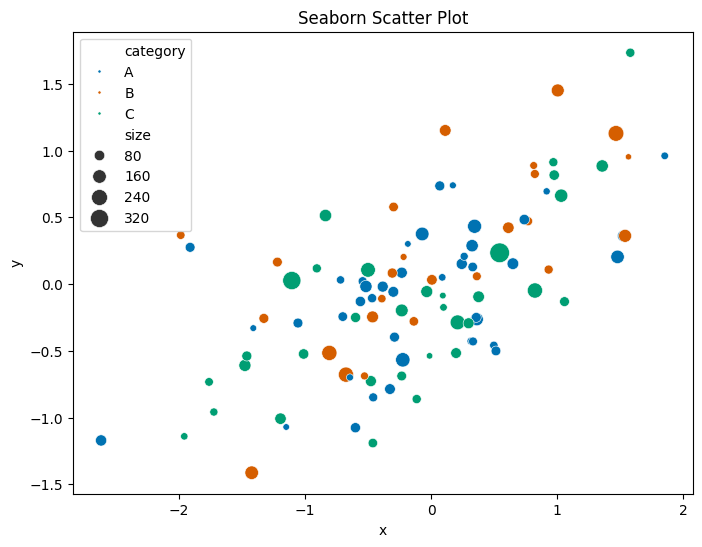

In [15]:
# Create seaborn plot with recording
fig, ax = ps.subplots(figsize=(8, 6))

# Use ps.sns instead of sns for recording
ps.sns.scatterplot(
    data=df,
    x="x",
    y="y",
    hue="category",
    size="size",
    sizes=(20, 200),
    palette=["#0072B2", "#D55E00", "#009E73"],
    ax=ax,
    id="seaborn_scatter",
)

ax.set_title("Seaborn Scatter Plot")

# Save recipe with validation
recipe_path = output_dir / "seaborn_example.yaml"
ps.save(fig, recipe_path, validate=True)

Text(0.5, 1.0, 'Reproduced Seaborn Plot')

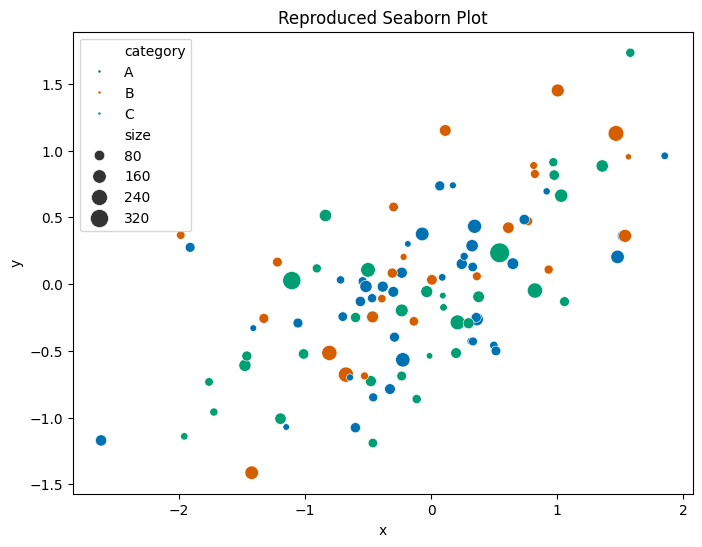

In [16]:
# Reproduce the seaborn plot
fig_rep, ax_rep = ps.reproduce(recipe_path)
ax_rep.set_title("Reproduced Seaborn Plot")

---
## 7. Validation

Verify that recipes produce identical figures.

Saved: ../outputs/notebook/validated_figure.yaml (Validation: PASSED)


(PosixPath('../outputs/notebook/validated_figure.yaml'),
 ValidationResult(VALID, mse=0.00, size=match))

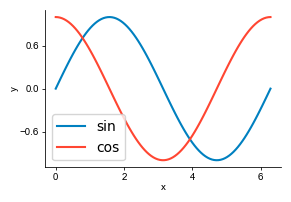

In [17]:
# Create a figure with validation on save
fig, ax = ps.subplots(
    axes_width_mm=60,
    axes_height_mm=40,
    margin_left_mm=12,
    margin_bottom_mm=10,
    apply_style_mm=True,
)

x = np.linspace(0, 2 * np.pi, 100)
ax.plot(x, np.sin(x), id="sin")
ax.plot(x, np.cos(x), id="cos")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(["sin", "cos"])

# Save with validation - prints status automatically
recipe_path = output_dir / "validated_figure.yaml"
ps.save(fig, recipe_path, validate=True)

Recipe validation: PASSED


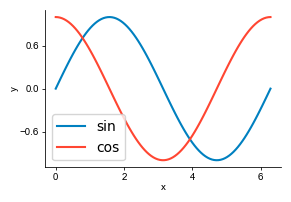

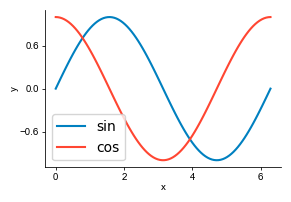

In [18]:
# Standalone validation of an existing recipe
result = ps.validate(recipe_path)
print(f"Recipe validation: {'PASSED' if result.valid else 'FAILED'}")

---
## 8. Recipe Inspection

Examine the contents of a saved recipe.

In [19]:
# Get recipe information without reproducing
info = ps.info(recipe_path)

print("Recipe Information:")
print(f"  ID: {info['id']}")
print(f"  Created: {info['created']}")
print(f"  Matplotlib version: {info['matplotlib_version']}")
print(f"  Figure size: {info['figsize']}")
print(f"  DPI: {info['dpi']}")
print(f"  Number of axes: {info['n_axes']}")
print(f"\nCalls:")
for call in info["calls"]:
    call_type = call.get("type", "plot")
    print(f"  - {call['id']}: {call['function']}() [{call_type}]")

Recipe Information:
  ID: fig_8e3bb8c1
  Created: 2025-12-22T02:33:00.410194
  Matplotlib version: 3.10.8
  Figure size: (3.0314960629921264, 2.283464566929134)
  DPI: 100
  Number of axes: 1

Calls:
  - sin: plot() [plot]
  - cos: plot() [plot]
  - set_xlabel_000: set_xlabel() [decoration]
  - set_ylabel_000: set_ylabel() [decoration]
  - legend_000: legend() [decoration]


In [20]:
# Load recipe as FigureRecord for programmatic access
record = ps.load(recipe_path)

print(f"Figure ID: {record.id}")
print(f"Axes keys: {list(record.axes.keys())}")

# Examine individual calls
for ax_key, ax_record in record.axes.items():
    print(f"\n{ax_key}:")
    for call in ax_record.calls:
        print(f"  {call.id}: {call.function}")
        print(f"    args: {len(call.args)} items")
        print(f"    kwargs: {list(call.kwargs.keys())}")

Figure ID: fig_8e3bb8c1
Axes keys: ['ax_0_0']

ax_0_0:
  sin: plot
    args: 2 items
    kwargs: ['color']
  cos: plot
    args: 2 items
    kwargs: ['color']


In [21]:
# View the actual YAML content
print("Recipe YAML (first 50 lines):")
print("-" * 50)
with open(recipe_path) as f:
    for i, line in enumerate(f):
        if i >= 50:
            print("...")
            break
        print(line, end="")

Recipe YAML (first 50 lines):
--------------------------------------------------
figrecipe: '1.0'
id: fig_8e3bb8c1
created: '2025-12-22T02:33:00.410194'
matplotlib_version: 3.10.8
figure:
  figsize:
    - 3.0314960629921264
    - 2.283464566929134
  dpi: 100
  layout:
    left: 0.15584415584415584
    right: 0.935064935064935
    bottom: 0.1724137931034483
    top: 0.8620689655172413
    wspace: 0
    hspace: 0
  style:
    axes_width_mm: 40
    axes_height_mm: 28
    axes_thickness_mm: 0.2
    margin_left_mm: 20
    margin_right_mm: 20
    margin_bottom_mm: 20
    margin_top_mm: 20
    space_w_mm: 8
    space_h_mm: 10
    tick_length_mm: 0.8
    tick_thickness_mm: 0.2
    n_ticks: 4
    trace_thickness_mm: 0.2
    marker_size_mm: 0.8
    font_family: "Arial"
    axis_font_size_pt: 7
    tick_font_size_pt: 7
    title_font_size_pt: 8
    suptitle_font_size_pt: 8
    legend_font_size_pt: 6
    label_pad_pt: 0.5
    tick_pad_pt: 2.0
    title_pad_pt: 1.0
    dpi: 300
    theme: "light"
 

---
## 9. Selective Reproduction

Reproduce only specific calls from a recipe.

Saved: ../outputs/notebook/multi_plot.yaml (Validation: PASSED)


(PosixPath('../outputs/notebook/multi_plot.yaml'),
 ValidationResult(VALID, mse=0.00, size=match))

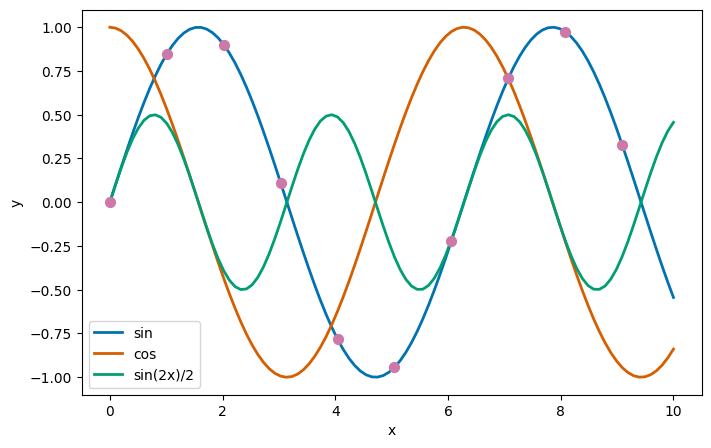

In [22]:
# Create figure with multiple plots
fig, ax = ps.subplots(figsize=(8, 5))

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x), color="#0072B2", linewidth=2, label="sin", id="sin_curve")
ax.plot(x, np.cos(x), color="#D55E00", linewidth=2, label="cos", id="cos_curve")
ax.plot(
    x,
    np.sin(2 * x) * 0.5,
    color="#009E73",
    linewidth=2,
    label="sin(2x)/2",
    id="sin2_curve",
)
ax.scatter(x[::10], np.sin(x[::10]), s=50, color="#CC79A7", zorder=5, id="markers")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

recipe_path = output_dir / "multi_plot.yaml"
ps.save(fig, recipe_path, validate=True)

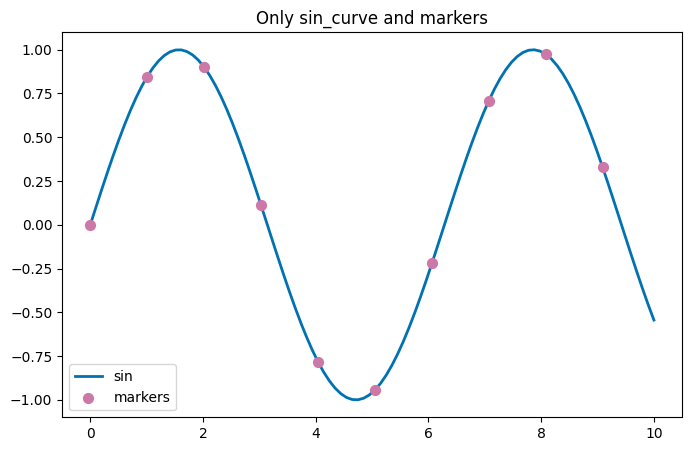

In [23]:
# Reproduce only specific calls
fig1, ax1 = ps.reproduce(recipe_path, calls=["sin_curve", "markers"])
ax1.set_title("Only sin_curve and markers")
ax1.legend(["sin", "markers"])

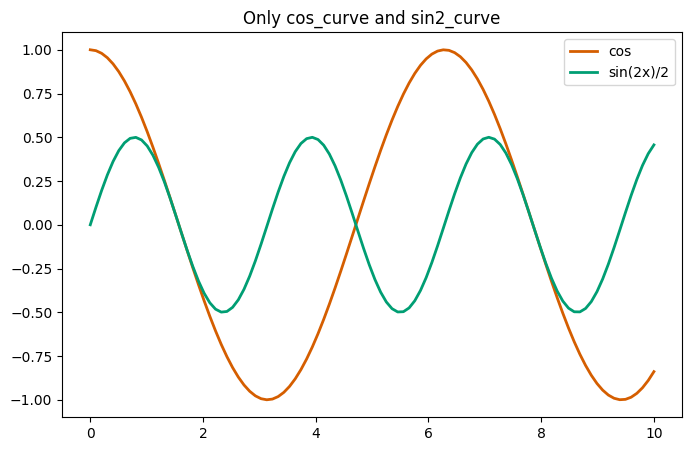

In [24]:
fig2, ax2 = ps.reproduce(recipe_path, calls=["cos_curve", "sin2_curve"])
ax2.set_title("Only cos_curve and sin2_curve")
ax2.legend(["cos", "sin(2x)/2"])

Text(0.5, 1.0, 'Reproduced without decorations (then manually added)')

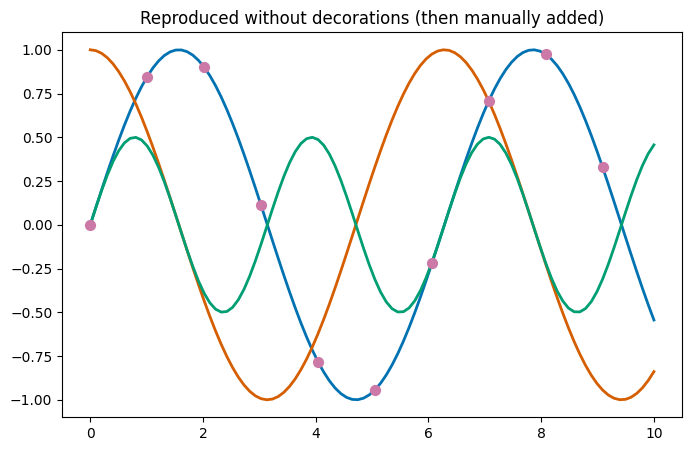

In [25]:
# Skip decorations (labels, titles, legends)
fig3, ax3 = ps.reproduce(recipe_path, skip_decorations=True)
ax3.set_title("Reproduced without decorations (then manually added)")

---
## 10. Unit Conversions

Utility functions for unit conversions.

In [26]:
# Unit conversion utilities
print("Unit Conversions:")
print(f"  10 mm = {ps.mm_to_inch(10):.3f} inches")
print(f"  10 mm = {ps.mm_to_pt(10):.1f} points")
print(f"  1 inch = {ps.inch_to_mm(1):.1f} mm")
print(f"  72 pt = {ps.pt_to_mm(72):.1f} mm")

# Common use case: setting line widths
style = ps.load_style()
print(
    f"\nTrace line width: {style.lines.trace_mm} mm = {ps.mm_to_pt(style.lines.trace_mm):.2f} pt"
)

Unit Conversions:
  10 mm = 0.394 inches
  10 mm = 28.3 points
  1 inch = 25.4 mm
  72 pt = 25.4 mm

Trace line width: 0.2 mm = 0.57 pt


---
## 11. Data Import/Export

Extract plotted data from saved recipes for reuse or analysis.

In [27]:
# Extract data from a saved recipe
data = ps.extract_data(output_dir / "basic_example.yaml")

print("Extracted data from basic_example.yaml:")
print(f"  Plot IDs: {list(data.keys())}")

# Access the sine wave data
sine_data = data["sine_wave"]
print(f"\nsine_wave data:")
print(f"  x shape: {sine_data['x'].shape}")
print(f"  y shape: {sine_data['y'].shape}")
print(f"  x range: [{sine_data['x'].min():.2f}, {sine_data['x'].max():.2f}]")

# Verify data integrity
print(f"\nData verification:")
print(f"  x matches original: {np.allclose(sine_data['x'], np.linspace(0, 2*np.pi, 100))}")
print(f"  y matches sin(x): {np.allclose(sine_data['y'], np.sin(sine_data['x']))}")

Extracted data from basic_example.yaml:
  Plot IDs: ['sine_wave', 'samples']

sine_wave data:
  x shape: (100,)
  y shape: (100,)
  x range: [0.00, 6.28]

Data verification:
  x matches original: True
  y matches sin(x): True


Image saved: auto_saved.png
Recipe saved: auto_saved.yaml


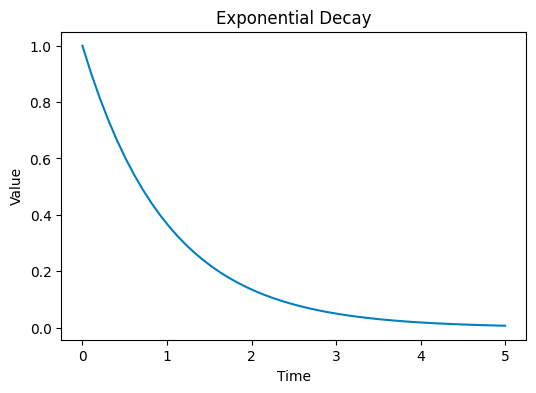

In [28]:
# savefig() automatically saves recipe alongside the image
fig, ax = ps.subplots(figsize=(6, 4))
ax.plot(np.linspace(0, 5, 50), np.exp(-np.linspace(0, 5, 50)), id="decay")
ax.set_xlabel("Time")
ax.set_ylabel("Value")
ax.set_title("Exponential Decay")

# savefig saves both PNG and YAML
img_path, recipe_path = fig.savefig(output_dir / "auto_saved.png")
print(f"Image saved: {img_path.name}")
print(f"Recipe saved: {recipe_path.name}")

# To save image only (no recipe):
# fig.savefig("image_only.png", save_recipe=False)

---
## Summary

figrecipe provides:

| Feature | Function/Parameter |
|---------|-------------------|
| Create figures | `ps.subplots()` or `import figrecipe.plt as plt` |
| Save recipes | `ps.save(fig, path)` or `fig.savefig(path)` |
| Reproduce | `ps.reproduce(path)` |
| Validate | `ps.validate(path)` (standalone) |
| Inspect | `ps.info(path)` or `ps.load(path)` |
| Extract data | `ps.extract_data(path)` |
| Style presets | `ps.list_presets()`, `ps.load_style('PRESET')` |
| MM layout | `axes_width_mm`, `margin_left_mm`, etc. |
| Seaborn | `ps.sns.scatterplot()`, etc. |
| Unit conversion | `ps.mm_to_pt()`, `ps.mm_to_inch()` |
| Available fonts | `ps.list_available_fonts()` |

In [29]:
# List all generated files
print("Generated recipe files:")
for f in sorted(output_dir.glob("*.yaml")):
    print(f"  outputs/notebook/{f.name}")

print("\nGenerated data files:")
for f in sorted(output_dir.glob("*.csv")):
    print(f"  outputs/notebook/{f.name}")

# Clean up open figures
plt.close("all")

Generated recipe files:
  outputs/notebook/auto_saved.yaml
  outputs/notebook/basic_example.yaml
  outputs/notebook/mm_layout.yaml
  outputs/notebook/multi_panel.yaml
  outputs/notebook/multi_plot.yaml
  outputs/notebook/seaborn_example.yaml
  outputs/notebook/styled_figure.yaml
  outputs/notebook/validated_figure.yaml

Generated data files:
